In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns
import pickle
import h5py
import xlrd
import xlwt
import heapq
import maskdb_parsing as maskdb
import nibabel as nib
from sklearn.decomposition import PCA
from scipy.stats import norm

In [122]:
df_maskdatabase = h5py.File('MaskDatabase.mat', 'r')
def get_mask_name(mask_no):
    st = df_maskdatabase['MaskDatabaseNames'][mask_no][0]
    obj = df_maskdatabase[st]
    str1 = ''.join(chr(i) for i in obj[:])
    return str1
mask_volume_list = []
mask_name_list = []
for i in range (294):
    mask_name = get_mask_name(i)
    mask_name_list.append(mask_name)
    mask_volume = df_maskdatabase['MaskDatabase']['jc'][i+1]-df_maskdatabase['MaskDatabase']['jc'][i]
    mask_volume_list.append(mask_volume)
df_mask_volume = pd.Series(mask_volume_list, index=mask_name_list)

In [123]:
dic_nos1_95 = {}
dic_vglu2b_95 = {}
wdir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
for file in os.listdir(wdir):
    if file.startswith('20230801'):# or file.startswith('20230721'):
        gene = file.split("_")[1]
        if gene == 'vglu2b':
            fish_id = file.split("_")[0]
            df = pd.read_csv(wdir+file, sep=',', index_col = 0)
            dic_vglu2b_95.update({fish_id:df})
        elif gene == 'nos1':
            fish_id = file.split("_")[0]
            df = pd.read_csv(wdir+file, sep=',', index_col = 0)
            dic_nos1_95.update({fish_id:df})
    elif file == 'eh1nos1ko_metadata.csv':
        metadata = pd.read_csv(wdir+file)

In [15]:
metadata

,Fish_id,Geno
0,20230801-1A,del
1,20230801-1B,del
2,20230801-2B,del
3,20230801-2G,del
4,20230801-1H,wt
5,20230801-2E,wt
6,20230801-3F,wt
7,20230801-3G,wt
8,20230721-13F,wt
9,20230721-19F,wt


In [124]:
ex_count_list = []
for fish in dic_nos1_95.keys():
    ex_count_list.append(dic_nos1_95[fish]['ex_count'])
df_nos1_ex = pd.concat(ex_count_list,axis=1)
df_nos1_ex.columns = dic_nos1_95.keys()
df_nos1_ex = pd.concat((df_nos1_ex,df_mask_volume),axis=1)
df_nos1_ex.rename(columns = {0:'total'}, inplace=True)
df_nos1_ex[metadata.loc[metadata.sort_values('Geno')['Fish_id'].isin(list(dic_nos1_95.keys()))]['Fish_id'].to_list()+['total']]


,20230801-1A,20230801-1B,20230801-2B,20230801-2G,20230801-1H,20230801-2E,20230801-3F,20230801-3G,20230801-1D,20230801-1E,20230801-1F,20230801-2C,20230801-4C,20230801-4D,total
Diencephalon -,1464807.0,1253632.0,1311526.0,1087988.0,1209540.0,1316158.0,1150288.0,1559483.0,1124590.0,1154912.0,1105125.0,1091031.0,985028.0,1234756.0,5314833.0
Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,4975.0,4980.0,3297.0,4919.0,4389.0,4903.0,4593.0,4933.0,4195.0,3707.0,3939.0,3429.0,4359.0,4867.0,5938.0
Diencephalon - Anterior preoptic dopaminergic cluster,1692.0,1032.0,1873.0,2430.0,2658.0,855.0,1052.0,1492.0,2082.0,1878.0,1263.0,1150.0,829.0,1716.0,8496.0
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,19665.0,23307.0,22837.0,25024.0,18083.0,24502.0,36151.0,35489.0,13736.0,15421.0,26467.0,20248.0,15986.0,17550.0,177957.0
Diencephalon - Caudal Hypothalamus,63728.0,63085.0,29402.0,45709.0,58380.0,67068.0,32113.0,116912.0,57687.0,54361.0,36334.0,55426.0,54737.0,67191.0,458300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telencephalon - Subpallium,257639.0,286936.0,254838.0,291112.0,291903.0,278434.0,329589.0,350604.0,253208.0,242541.0,297281.0,187999.0,273657.0,231841.0,597260.0
Telencephalon - Telencephalic Migrated Area 4 (M4),3156.0,2383.0,1472.0,3811.0,4678.0,8158.0,3584.0,5376.0,4620.0,17671.0,3674.0,12314.0,5085.0,11191.0,31219.0
Telencephalon - Vglut2 rind,179512.0,159162.0,153278.0,174836.0,179234.0,203463.0,173940.0,202388.0,178307.0,178578.0,176027.0,154766.0,158985.0,170484.0,314040.0
Telencephalon - Vmat2 cluster,23313.0,31730.0,23120.0,26603.0,26056.0,27352.0,31138.0,38828.0,22541.0,21090.0,31361.0,21337.0,29821.0,18398.0,61302.0


In [125]:
##excclude masks with in Eyes and one other mask below
df_nos1_ex = df_nos1_ex.drop('Rhombencephalon - VII\' Facial Motor and octavolateralis efferent neurons')
df_nos1_ex = df_nos1_ex.loc[~df_nos1_ex.index.str.contains('Eyes')]
df_nos1_ex_rank = (df_nos1_ex.iloc[:,:-1].mean(axis=1)/df_nos1_ex['total']).sort_values()
df_nos1_ex_rank = df_nos1_ex_rank.dropna()
df_nos1_ex_rank.tail(20)

Telencephalon - Pallium                                                    0.518723
Rhombencephalon - Ptf1a Stripe                                             0.521411
Rhombencephalon - Lobus caudalis cerebelli                                 0.543278
Ganglia - Lateral Line Neuromast SO1                                       0.555350
Telencephalon - Vglut2 rind                                                0.555653
Rhombencephalon - Area Postrema                                            0.560000
Telencephalon - Isl1 cluster 1                                             0.560029
Telencephalon - Subpallial dopaminergic cluster                            0.599597
Telencephalon - Subpallial Otpb Cluster 2                                  0.612495
Diencephalon - Hypothalamus s1181t Cluster                                 0.613650
Telencephalon - S1181t Cluster                                             0.632210
Ganglia - Lateral Line Neuromast SO2                                       0

### 4.compare the nos1 expression across different sample groups

In [126]:
## compute the nos1 expression of big masks 
df_bigmask = df_nos1_ex.loc[df_nos1_ex.index.str.split('-').str[-1].str.len()==0].transpose()
df_bigmask = pd.concat((metadata.sort_values('Geno').set_index('Fish_id'),df_bigmask), axis=1)
df_bigmask = df_bigmask.drop('total')
df_bigmask['Whole_brain'] = df_bigmask.iloc[:,1:].sum(axis=1)
df_bigmask = df_bigmask.dropna()

In [127]:
df_bigmask = df_bigmask.drop(['20230801-1D','20230801-1F','20230801-2E','20230801-4D'])

In [128]:
## comparison of each big mask didn't detect difference between three genotypes
p_val_list = []
for bigmask in df_bigmask.columns[1:5]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[1:5])
df_com_res_bigmask

Diencephalon -       0.043982
Mesencephalon -      0.537436
Rhombencephalon -    0.169536
Telencephalon -      0.093139
dtype: float64

In [129]:
p_val_list = []
for bigmask in df_bigmask.columns[1:5]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[1:5])
df_com_res_bigmask

Diencephalon -       0.043982
Mesencephalon -      0.537436
Rhombencephalon -    0.169536
Telencephalon -      0.093139
dtype: float64

In [130]:
df_ex_count = df_nos1_ex.copy()
df_comp = pd.concat((metadata[metadata['Fish_id'].isin(df_ex_count.columns)].sort_values('Geno').set_index('Fish_id'),
                     df_ex_count.transpose()),
          axis=1)
df_comp = df_comp.dropna()
#eliminate masks with 0 experssion in one individual
df_comp = df_comp.loc[:,~(df_comp==0).any()]
df_comp = df_comp.drop(['20230801-1D','20230801-1F','20230801-2E','20230801-4D'])

In [131]:
output_dir='/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_comp.transpose().to_csv(output_dir+'ko_nos1_ex_count_raw_20230819.csv')

In [137]:

##anova
def anova_comp(df):

    anova_list = []
    for mask in df.columns[1:]:
        anova = pg.anova(dv=mask, between='Geno', data=df)
        anova_list.append(anova)

    df_res = pd.concat(anova_list)
    df_res.index = df.columns[1:]
    return df_res
##ancova
def ancova(df):
    bigmasks = df.loc[:,df.columns.str.split('-').str[-1].str.len()==0].columns
    ancova_list = []
    mask_list = []
    for mask in df.columns[1:]:
        if mask not in bigmasks and (mask.split('-')[0]+'-') in bigmasks:
            covariable = mask.split('-')[0]+'-'
            ancova = pg.ancova(data = df, dv = mask, covar=covariable, between='Geno')
            ancova_list.append(ancova.iloc[0,4])
            mask_list.append(mask)
        else: 
            next
    df_res = pd.Series(ancova_list)
    df_res.index = mask_list
    return df_res


def permutation_ancova(df, perm_no):
    df_ancova_res = ancova(df)
    df_perm_res = pd.concat((df_ancova_res , pd.Series(0, df_ancova_res.index)),axis=1)
    df_perm_res.rename(columns={0:'p-unc'}, inplace=True)
    df_adj_p_ancova = df_perm_res.copy()
    mse_list = []
    for i in range (1,perm_no):
        df_perm = df.copy()
        df_perm['Geno'] = df_perm['Geno'].sample(frac=1).values
        df_perm_res[i]=ancova(df_perm)
        df_perm_zscore = pd.concat([df_perm_res['p-unc'], df_perm_res.iloc[:,1:].mean(axis=1), df_perm_res.iloc[:,1:].std(axis=1)], axis=1)
        df_perm_zscore.rename(columns={0:'mean', 1:'std'}, inplace=True)
        df_perm_zscore['zscore'] = (df_perm_zscore['p-unc']-df_perm_zscore['mean'])/df_perm_zscore['std']
        df_perm_zscore['adj_p'] = df_perm_zscore['zscore'].apply(lambda x: 1-norm.sf((x)))
        df_adj_p_ancova[i] = df_perm_zscore['adj_p']
        if i>=20:
            mse = (((df_adj_p_ancova[i]-df_adj_p_ancova[i-1])**2).sum())/(df.shape[1]-5)
            mse_list.append(mse)
            if mse<1e-08:
                break
        if i%100==0:
            print(i)
    return (df_adj_p_ancova,mse_list)

def permutation_anova(df, perm_no):
    df_anova_res = anova_comp(df)
    df_perm_res = pd.concat((df_anova_res['p-unc'] , pd.Series(0, df_anova_res.index)),axis=1)
    #df_perm_res.rename(columns={0:'p-unc'}, inplace=True)
    df_adj_p_anova = df_perm_res.copy()
    mse_list = []
    for i in range (1,perm_no):
        df_perm = df.copy()
        df_perm['Geno'] = df_perm['Geno'].sample(frac=1).values
        df_perm_res[i]=anova_comp(df_perm)['p-unc']
        df_perm_zscore = pd.concat([df_perm_res['p-unc'], df_perm_res.iloc[:,1:].mean(axis=1), df_perm_res.iloc[:,1:].std(axis=1)], axis=1)
        df_perm_zscore.rename(columns={0:'mean', 1:'std'}, inplace=True)
        df_perm_zscore['zscore'] = (df_perm_zscore['p-unc']-df_perm_zscore['mean'])/df_perm_zscore['std']
        df_perm_zscore['adj_p'] = df_perm_zscore['zscore'].apply(lambda x: 1-norm.sf((x)))
        df_adj_p_anova[i] = df_perm_zscore['adj_p']
        if i>=20:
            mse = (((df_adj_p_anova[i]-df_adj_p_anova[i-1])**2).sum())/(df.shape[1]-5)
            mse_list.append(mse)
            if mse<1e-08:
                break
        if i%100==0:
            print(i)
    return (df_adj_p_anova,mse_list)


def ratio_median_norm(df_comp):
    df_comp_norm = df_comp.loc[:,~df_comp.columns.isin(df_bigmask.columns[1:5])].iloc[:,1:].transpose()

    df_comp_norm['Genometric_mean'] = stats.gmean(df_comp_norm,axis=1)

    df_comp_norm = df_comp_norm.loc[df_comp_norm['Genometric_mean']!=0]

    for i in range(df_comp_norm.shape[1]-1):
        df_comp_norm.iloc[:,i] = df_comp_norm.iloc[:,i]/(df_comp_norm.iloc[:,i]/df_comp_norm.iloc[:,-1]).median()

    df_comp_norm = pd.concat((df_comp['Geno'],df_comp_norm.transpose(),df_comp[df_bigmask.columns[1:5]]),axis=1)
    df_comp_norm = df_comp_norm.drop('Genometric_mean')
    return df_comp_norm

def box_scatter_plot(sigmasks, df_comp, dotsize, xticklabel, figsize):
    df_temp_list = []
    for mask in sorted(list(sigmasks)):
        covariable = mask.split('-')[0]+'-'
        df_temp = df_comp.loc[:,['Geno', mask, covariable]]
        df_temp.loc[:,'mask'] = mask
        df_temp.rename(columns={mask:'HCR'}, inplace=True)
        #df_temp['HCR'] = df_temp['HCR']/df_temp[covariable]
        df_temp['HCR'] = (df_temp['HCR']-df_temp['HCR'].mean())/df_temp['HCR'].std()
        df_temp_list.append(df_temp)
    df_plot = pd.concat(df_temp_list)
    df_plot['Geno'] = df_plot['Geno'].map({'del':'ko', 'wt':'control'})
    ## plot the data
    font_size = 2*len(list(sigmasks))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.boxplot(x="mask", y="HCR", hue="Geno",
                data = df_plot.sort_values('Geno'),ax=ax, palette = ['#B0DAEF','#DE8CBB'])

    sns.stripplot(x="mask", y="HCR", hue="Geno",data=df_plot.sort_values('Geno'), 
                  jitter=True,dodge=True, marker='o', palette = ['#B0DAEF','#DE8CBB'],edgecolor='#808080',
                  ax=ax, size=dotsize, linewidth=4)
    if xticklabel==True:
        ax.set_xticklabels(labels = sorted(list(sigmasks)),
                           ha='right', fontsize=font_size)
    else:
        ax.set_xticklabels('')
    ax.set_yticks(np.arange(-2,4,2))
    #ax.set_yticklabels(labels = np.arange(0,1.5,0.5).round(1),fontsize=font_size)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend("",frameon=False, loc = [0, 0.9])
    plt.show()



### ancova with non-normalized data

In [20]:
df_res = anova_comp(df_comp)
df_res.loc[df_res['p-unc']<=0.05].sort_values('p-unc')

,Source,ddof1,ddof2,F,p-unc,np2
Telencephalon - Isl1 cluster 1,Geno,1,8,13.518841,0.006248,0.628233
Rhombencephalon - Gad1b Stripe 3,Geno,1,8,8.280859,0.020586,0.508625
Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons,Geno,1,8,7.825293,0.023292,0.494480
Rhombencephalon - Vmat2 Cluster 5,Geno,1,8,7.289038,0.027082,0.476749
Rhombencephalon - Oxtl Cluster 2 Near MC axon cap,Geno,1,8,6.349763,0.035816,0.442499
Rhombencephalon - Glyt2 Stripe 3,Geno,1,8,6.127685,0.038385,0.433736
Telencephalon - Subpallium,Geno,1,8,6.058332,0.039235,0.430942
Rhombencephalon - 6.7FDhcrtR-Gal4 Stripe 1,Geno,1,8,5.997176,0.040004,0.428456
Ganglia - Olfactory Epithelium,Geno,1,8,5.935410,0.040801,0.425923
Telencephalon - Pallium,Geno,1,8,5.900608,0.041259,0.424486


In [21]:
df_res = ancova(df_comp)
df_res.loc[df_res<=0.05].sort_values()

Diencephalon - Preoptic area Vglut2 cluster    0.034939
dtype: float64

### permutation ancova with non-normalized data

In [50]:
perm_ancova_res = permutation_ancova(df_comp,500)

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


100
200
300
400


In [51]:
df_perm_ancova_res = perm_ancova_res[0]
df_perm_ancova_res[df_perm_ancova_res[499]<0.05].sort_values(499)

,p-unc,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Diencephalon - Torus Lateralis,0.016075,NaN,1.590028e-11,0.002359,0.003386,0.000798,0.000191,0.000315,0.007359,0.009658,...,0.032601,0.032532,0.032356,0.032929,0.032805,0.032928,0.033042,0.033055,0.032904,0.032830
Diencephalon - Preoptic Area,0.024854,NaN,4.783381e-02,0.010047,0.001939,0.001746,0.000547,0.000167,0.007976,0.020325,...,0.036478,0.036454,0.036286,0.036119,0.036001,0.035886,0.035703,0.035595,0.035880,0.035698
Rhombencephalon - Glyt2 Cluster 2,0.029445,NaN,0.000000e+00,0.006479,0.009189,0.003734,0.023238,0.013521,0.011561,0.008458,...,0.036575,0.036872,0.036816,0.036639,0.036478,0.036425,0.036310,0.036155,0.035993,0.035812
Mesencephalon - Sparse 6.7FRhcrtR cluster,0.011792,NaN,9.219608e-02,0.042687,0.109420,0.070033,0.045513,0.073932,0.057932,0.046401,...,0.049615,0.049445,0.049249,0.049639,0.049546,0.049792,0.050096,0.049901,0.050162,0.049940


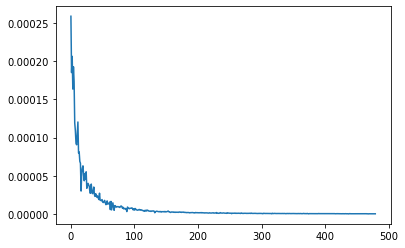

In [16]:
perm_ancova_mse_list = perm_ancova_res[1]
df_mse = pd.Series(perm_ancova_mse_list)
df_mse.plot()
plt.show()

### permutation-anova with normalized data

### normalize the date using ratio of median

In [232]:
df_comp_norm = ratio_median_norm(df_comp)
output_dir='/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_comp_norm.transpose().to_csv(output_dir+'ko_nos1_ex_count_normalized_20230819.csv')

### determine all possible shuffled arrangement in permutation 

In [130]:
arraylist = [df_comp_norm['Geno'].to_list()]
while len(arraylist)<210:#the maximum round of permutation test based on current dataset is 210
    
    array = df_comp_norm['Geno'].sample(frac=1).to_list()
    if array in arraylist:
        next
    else:
        arraylist.append(array)

### permutate to get empirical anova p-val

In [ ]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    num = arraylist.index(array)
    if num%50 == 0:
        print(num)
    df_perm['Geno'] = array
    permpvals.append(anova_comp(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_anova = anova_comp(df_comp_norm)['p-unc']
df_padj_anova = ((df_exp_anova-df_perm['p-unc'].mean(axis=1))/df_perm['p-unc'].std(axis=1)).apply(lambda x: 1-norm.sf((x)))


In [180]:
df_padj_anova.loc[df_padj_anova<0.05]

Diencephalon - Medial vglut2 cluster                                0.043764
Rhombencephalon - 6.7FDhcrtR-Gal4 Stripe 1                          0.047812
Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons    0.046306
Rhombencephalon - Gad1b Stripe 3                                    0.043894
Rhombencephalon - Oxtl Cluster 2 Near MC axon cap                   0.047930
dtype: float64

### check if mask with signifincat anova results affected by covariable

In [173]:
sigmask_perm_anova = df_padj_anova.loc[df_padj_anova<0.05].index.to_list()
pco_list = []
masks = []
for mask in sigmask_perm_anova:
    covariable = mask.split('-')[0]+'-'
    pco = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[1,4]
    pval = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[0,4]
    pco_list.append(pco)
    if pco<0.05 and pval>0.05:
        masks.append(mask)
        sigmask_perm_anova.remove(mask)
sigmask_perm_anova

['Diencephalon - Medial vglut2 cluster',
 'Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons',
 'Rhombencephalon - Gad1b Stripe 3',
 'Rhombencephalon - Oxtl Cluster 2 Near MC axon cap']

### permutate to get empirical ancova p-val

In [183]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    df_perm['Geno'] = array
    permpvals.append(ancova(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_ancova = ancova(df_comp_norm)
df_padj_ancova = ((df_exp_ancova-df_perm.mean(axis=1))/df_perm.std(axis=1)).apply(lambda x: 1-norm.sf((x)))

In [184]:
sigmask_perm_ancova = df_padj_ancova.loc[df_padj_ancova<0.05].index

### combine anova result with ancova result

In [185]:
ko_sigmasks = set(sigmask_perm_anova)|set(sigmask_perm_ancova)
ko_sigmasks
                                                           

{'Diencephalon - Medial vglut2 cluster',
 'Diencephalon - Posterior Tuberculum',
 'Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons',
 'Rhombencephalon - Gad1b Stripe 3',
 'Rhombencephalon - Oxtl Cluster 2 Near MC axon cap'}

In [118]:
list(ko_sigmasks)[:2]

['Telencephalon - Olfactory bulb dopaminergic neuron areas',
 'Rhombencephalon - Gad1b Cluster 1']

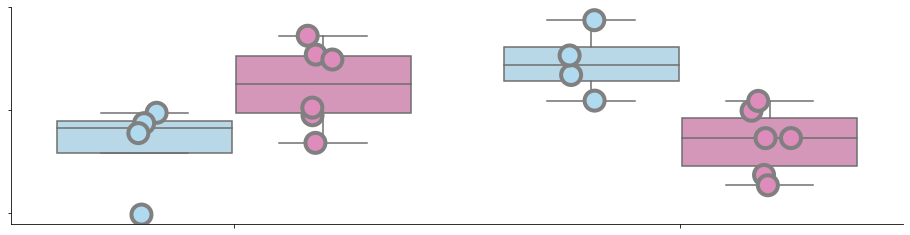

In [138]:
box_scatter_plot(['Diencephalon - Posterior Tuberculum',
                 'Rhombencephalon - Gad1b Stripe 3'], df_comp_norm, 20, False, (16,4))

In [140]:
df_comp_norm[['Diencephalon - Posterior Tuberculum',
                 'Rhombencephalon - Gad1b Stripe 3']]

,Diencephalon - Posterior Tuberculum,Rhombencephalon - Gad1b Stripe 3
20230801-1A,124040.084710,25215.335228
20230801-1B,125222.293633,30763.219554
20230801-2B,129732.833066,28394.866140
20230801-2G,112523.621832,31612.007060
20230801-1E,110701.069070,28399.721471
20230801-2C,104085.706266,24324.898720
20230801-1H,106421.546275,31634.709391
20230801-3F,108800.806634,38584.142036
20230801-3G,111292.104112,33850.689636
20230801-4C,86917.061107,35534.593178


In [95]:
list(ko_sigmasks)[1]

'Rhombencephalon - Gad1b Cluster 1'

In [210]:
df_ko_stats = pd.concat((df_exp_anova, df_exp_ancova, df_padj_anova, df_padj_ancova),axis=1)
df_ko_stats.columns = ['p_unc_anova', 'p_unc_ancova','p_adj_anova', 'p_adj_ancova']
df_ko_stats = df_ko_stats.loc[~df_ko_stats.index.isin(df_bigmask.columns)]
df_ko_stats = df_ko_stats.dropna()

In [213]:
output_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'
df_ko_stats.to_csv(output_dir+'ko_stats_20230819.csv')

In [226]:
ko_sigmasks

{'Diencephalon - Medial vglut2 cluster',
 'Diencephalon - Posterior Tuberculum',
 'Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons',
 'Rhombencephalon - Gad1b Stripe 3',
 'Rhombencephalon - Oxtl Cluster 2 Near MC axon cap'}

## vglu2b comparison

In [22]:
ex_count_list = []
for fish in dic_vglu2b_95.keys():
    ex_count_list.append(dic_vglu2b_95[fish]['ex_count'])
df_vglu2b_ex = pd.concat(ex_count_list,axis=1)
df_vglu2b_ex.columns = dic_vglu2b_95.keys()
df_vglu2b_ex = pd.concat((df_vglu2b_ex,df_mask_volume),axis=1)
df_vglu2b_ex.rename(columns = {0:'total'}, inplace=True)
df_vglu2b_ex[metadata.loc[metadata.sort_values('Geno')['Fish_id'].isin(list(dic_vglu2b_95.keys()))]['Fish_id'].to_list()+['total']]

,20230801-1A,20230801-1B,20230801-2B,20230801-2G,20230801-1H,20230801-2E,20230801-3F,20230801-3G,20230801-1E,20230801-2C,20230801-4C,total
Diencephalon -,2066020.0,1975449.0,1822390.0,2037867.0,2045791.0,2091424.0,1816004.0,2215607.0,2027246.0,1208374.0,2028973.0,5314833.0
Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,5907.0,5938.0,5938.0,5706.0,5284.0,5682.0,5541.0,5872.0,5102.0,2618.0,5137.0,5938.0
Diencephalon - Anterior preoptic dopaminergic cluster,1273.0,1403.0,1732.0,1366.0,1672.0,1105.0,1198.0,1563.0,1723.0,1048.0,2535.0,8496.0
Diencephalon - Anterior pretectum cluster of vmat2 Neurons,42016.0,54173.0,51751.0,57139.0,56804.0,58889.0,56782.0,63042.0,43246.0,34572.0,57398.0,177957.0
Diencephalon - Caudal Hypothalamus,12697.0,17304.0,542.0,27242.0,28629.0,15512.0,7327.0,47266.0,31617.0,5313.0,17434.0,458300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Telencephalon - Subpallium,151750.0,148030.0,164308.0,168465.0,169689.0,152484.0,170118.0,179003.0,157524.0,103891.0,146017.0,597260.0
Telencephalon - Telencephalic Migrated Area 4 (M4),1751.0,1449.0,2427.0,3211.0,2473.0,2436.0,7124.0,6439.0,9844.0,21925.0,1437.0,31219.0
Telencephalon - Vglut2 rind,180791.0,226762.0,240937.0,219279.0,239210.0,230221.0,232521.0,233811.0,233839.0,200245.0,230803.0,314040.0
Telencephalon - Vmat2 cluster,10745.0,14989.0,10086.0,14186.0,16846.0,12101.0,11528.0,12610.0,15739.0,6170.0,14058.0,61302.0


In [23]:
##excclude masks with in Eyes and one other mask below
df_vglu2b_ex = df_vglu2b_ex.drop('Rhombencephalon - VII\' Facial Motor and octavolateralis efferent neurons')
df_vglu2b_ex = df_vglu2b_ex.loc[~df_vglu2b_ex.index.str.contains('Eyes')]
df_vglu2b_ex_rank = (df_vglu2b_ex.iloc[:,:-1].mean(axis=1)/df_vglu2b_ex['total']).sort_values()
df_vglu2b_ex_rank = df_vglu2b_ex_rank.dropna()
df_vglu2b_ex_rank.tail(20)

Diencephalon - Hypothalamus 6.7FRhcrtR-Gal4 cluster 1                      0.707078
Telencephalon - Vglut2 rind                                                0.714564
Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus            0.718750
Diencephalon - Medial vglut2 cluster                                       0.721548
Diencephalon - Oxtl Cluster 2                                              0.729314
Rhombencephalon - Area Postrema                                            0.753676
Diencephalon - Isl1 cluster 3                                              0.759713
Rhombencephalon - Glyt2 Cluster 2                                          0.763524
Diencephalon - Hypothalamus Olig2 cluster                                  0.765129
Rhombencephalon - Qrfp neuron cluster sparse                               0.768188
Rhombencephalon - Vmat2 Stripe1                                            0.772340
Telencephalon - Olfactory Bulb                                             0

In [29]:
### 4.compare the vglu2b expression across different sample groups

## compute the vglu2b expression of big masks 
df_bigmask = df_vglu2b_ex.loc[df_vglu2b_ex.index.str.split('-').str[-1].str.len()==0].transpose()
df_bigmask = pd.concat((metadata.sort_values('Geno').set_index('Fish_id'),df_bigmask), axis=1)
df_bigmask = df_bigmask.drop('total')
df_bigmask['Whole_brain'] = df_bigmask.iloc[:,1:].sum(axis=1)
df_bigmask = df_bigmask.dropna()

df_bigmask = df_bigmask.drop(['20230801-2E'])

## comparison of each big mask didn't detect difference between three genotypes
p_val_list = []
for bigmask in df_bigmask.columns[1:5]:
    p_val = pg.ancova(data = df_bigmask, dv = bigmask, covar='Whole_brain', between='Geno')
    p_val = p_val.iloc[0,4]
    p_val_list.append(p_val)
df_com_res_bigmask = pd.Series(p_val_list, index = df_bigmask.columns[1:5])
df_com_res_bigmask

df_ex_count = df_vglu2b_ex.copy()
df_comp = pd.concat((metadata[metadata['Fish_id'].isin(df_ex_count.columns)].sort_values('Geno').set_index('Fish_id'),
                     df_ex_count.transpose()),
          axis=1)
df_comp = df_comp.dropna()
#eliminate masks with 0 experssion in one individual
df_comp = df_comp.loc[:,~(df_comp==0).any()]
df_comp = df_comp.drop(['20230801-2E'])

In [30]:
df_comp

,Geno,Diencephalon -,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,...,Telencephalon - S1181t Cluster,Telencephalon - Subpallial Gad1b cluster,Telencephalon - Subpallial Otpb Cluster 2,Telencephalon - Subpallial Otpb strip,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster
20230801-1A,del,2066020.0,5907.0,1273.0,42016.0,12697.0,156292.0,14574.0,7955.0,6851.0,...,2769.0,63008.0,7095.0,5776.0,2921.0,2942.0,151750.0,1751.0,180791.0,10745.0
20230801-1B,del,1975449.0,5938.0,1403.0,54173.0,17304.0,126541.0,15256.0,11400.0,8664.0,...,2944.0,52547.0,7175.0,6749.0,6028.0,3520.0,148030.0,1449.0,226762.0,14989.0
20230801-2B,del,1822390.0,5938.0,1732.0,51751.0,542.0,73897.0,19815.0,13290.0,9000.0,...,2240.0,58166.0,5231.0,7210.0,13714.0,2259.0,164308.0,2427.0,240937.0,10086.0
20230801-2G,del,2037867.0,5706.0,1366.0,57139.0,27242.0,154618.0,15888.0,7368.0,4307.0,...,3072.0,54434.0,6854.0,7436.0,10179.0,3868.0,168465.0,3211.0,219279.0,14186.0
20230801-1E,del,2027246.0,5102.0,1723.0,43246.0,31617.0,138889.0,14100.0,6635.0,3872.0,...,3894.0,59535.0,8171.0,7572.0,3154.0,4243.0,157524.0,9844.0,233839.0,15739.0
20230801-2C,del,1208374.0,2618.0,1048.0,34572.0,5313.0,107919.0,2376.0,1974.0,65.0,...,3376.0,32905.0,5825.0,1990.0,4379.0,956.0,103891.0,21925.0,200245.0,6170.0
20230801-1H,wt,2045791.0,5284.0,1672.0,56804.0,28629.0,141684.0,16257.0,6429.0,3399.0,...,2762.0,64939.0,6919.0,10145.0,9663.0,3349.0,169689.0,2473.0,239210.0,16846.0
20230801-3F,wt,1816004.0,5541.0,1198.0,56782.0,7327.0,150264.0,16493.0,6214.0,4384.0,...,3595.0,43083.0,5279.0,4800.0,18133.0,1794.0,170118.0,7124.0,232521.0,11528.0
20230801-3G,wt,2215607.0,5872.0,1563.0,63042.0,47266.0,158574.0,18504.0,9097.0,7650.0,...,5467.0,53032.0,7884.0,4960.0,15003.0,2637.0,179003.0,6439.0,233811.0,12610.0
20230801-4C,wt,2028973.0,5137.0,2535.0,57398.0,17434.0,145159.0,14482.0,6060.0,5497.0,...,4176.0,58111.0,10464.0,6238.0,2930.0,3521.0,146017.0,1437.0,230803.0,14058.0


In [33]:
df_comp_norm = ratio_median_norm(df_comp)

In [34]:
arraylist = [df_comp_norm['Geno'].to_list()]
while len(arraylist)<210:#the maximum round of permutation test based on current dataset is 210
    
    array = df_comp_norm['Geno'].sample(frac=1).to_list()
    if array in arraylist:
        next
    else:
        arraylist.append(array)

In [35]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    num = arraylist.index(array)
    if num%50 == 0:
        print(num)
    df_perm['Geno'] = array
    permpvals.append(anova_comp(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_anova = anova_comp(df_comp_norm)['p-unc']
df_padj_anova = ((df_exp_anova-df_perm['p-unc'].mean(axis=1))/df_perm['p-unc'].std(axis=1)).apply(lambda x: 1-norm.sf((x)))


0
50
100
150
200


In [37]:
sigmask_perm_anova = df_padj_anova.loc[df_padj_anova<0.05].index.to_list()
pco_list = []
masks = []
for mask in sigmask_perm_anova:
    covariable = mask.split('-')[0]+'-'
    pco = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[1,4]
    pval = pg.ancova(data = df_comp_norm, dv = mask, covar=covariable, between='Geno').iloc[0,4]
    pco_list.append(pco)
    if pco<0.05 and pval>0.05:
        masks.append(mask)
        sigmask_perm_anova.remove(mask)
sigmask_perm_anova

['Rhombencephalon - Gad1b Cluster 1',
 'Telencephalon - Olfactory bulb dopaminergic neuron areas']

In [38]:
df_perm = df_comp_norm.copy()
permpvals = []
for array in arraylist:
    df_perm['Geno'] = array
    permpvals.append(ancova(df_perm))
df_perm = pd.concat(permpvals,axis=1)
df_exp_ancova = ancova(df_comp_norm)
df_padj_ancova = ((df_exp_ancova-df_perm.mean(axis=1))/df_perm.std(axis=1)).apply(lambda x: 1-norm.sf((x)))

In [40]:
sigmask_perm_ancova = df_padj_ancova.loc[df_padj_ancova<0.05].index

In [41]:
ko_sigmasks = set(sigmask_perm_anova)|set(sigmask_perm_ancova)
ko_sigmasks

{'Rhombencephalon - Gad1b Cluster 1',
 'Telencephalon - Olfactory bulb dopaminergic neuron areas',
 'Telencephalon - Olig2 Cluster'}

In [42]:
list(ko_sigmasks)

['Telencephalon - Olfactory bulb dopaminergic neuron areas',
 'Rhombencephalon - Gad1b Cluster 1',
 'Telencephalon - Olig2 Cluster']

In [75]:
df_ko_stats = pd.concat((df_exp_anova, df_exp_ancova, df_padj_anova, df_padj_ancova),axis=1)
df_ko_stats.columns = ['p_unc_anova', 'p_unc_ancova','p_adj_anova', 'p_adj_ancova']
df_ko_stats = df_ko_stats.loc[~df_ko_stats.index.isin(df_bigmask.columns)]
df_ko_stats = df_ko_stats.dropna()

In [77]:
wdir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/HCR/HCR_analysis/'

df_ko_stats.to_csv(wdir+'ko_vglu_stats.csv')

In [82]:
df_comp_norm.groupby('Geno').mean()[ko_sigmasks].diff()

,Telencephalon - Olfactory bulb dopaminergic neuron areas,Rhombencephalon - Gad1b Cluster 1,Telencephalon - Olig2 Cluster
Geno,,,
del,NaN,NaN,NaN
wt,-8553.997126,1105.043921,569.832677


In [88]:
df_comp.transpose().to_csv(wdir+'ko_vglut_ex_count_raw_20230819.csv')

In [89]:
df_comp_norm.transpose().to_csv(wdir+'ko_vglut_ex_count_norm_20230819.csv')

In [87]:
df_comp_norm = ratio_median_norm(df_comp)
df_comp_norm 

,Geno,Diencephalon - Anterior group of the posterior tubercular vmat2 neurons,Diencephalon - Anterior preoptic dopaminergic cluster,Diencephalon - Anterior pretectum cluster of vmat2 Neurons,Diencephalon - Caudal Hypothalamus,Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus,Diencephalon - Dopaminergic Cluster 1 - ventral thalamic and periventricular posterior tubercular DA neurons,Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum,Diencephalon - Dopaminergic Cluster 3 - hypothalamus,Diencephalon - Dopaminergic Cluster 4/5 - posterior tuberculum and hypothalamus,...,Telencephalon - Subpallial Vglut2 Cluster,Telencephalon - Subpallial dopaminergic cluster,Telencephalon - Subpallium,Telencephalon - Telencephalic Migrated Area 4 (M4),Telencephalon - Vglut2 rind,Telencephalon - Vmat2 cluster,Diencephalon -,Mesencephalon -,Rhombencephalon -,Telencephalon -
20230801-1A,del,5283.286903,1138.585446,37579.580582,11356.338886,139789.313794,13035.148691,7115.041021,6127.611066,13053.036915,...,2612.575088,2631.357723,135726.898167,1566.113995,161701.493552,9610.448243,2066020.0,2592529.0,2148922.0,872159.0
20230801-1B,del,5347.071339,1263.378425,48781.895531,15581.967406,113948.089314,13737.777089,10265.512507,7801.789506,10223.189780,...,5428.114859,3169.702107,133298.580390,1304.800669,204195.451506,13497.347980,1975449.0,2787629.0,2216186.0,967773.0
20230801-2B,del,5530.759101,1613.215689,48201.804349,504.828466,68828.983710,18456.044389,12378.543019,8382.760510,6572.084240,...,12773.464181,2104.072888,153039.401537,2260.551084,224413.018771,9394.280278,1822390.0,2586865.0,2150807.0,1009402.0
20230801-2G,del,5130.278043,1228.173818,51373.809519,24493.346382,139017.408077,14284.938232,6624.586159,3872.433847,12135.184499,...,9151.962882,3477.727913,151467.278401,2887.017665,197154.265518,12754.666022,2037867.0,2830560.0,2092058.0,1034507.0
20230801-1E,del,4896.385364,1653.561737,41503.151991,30342.809890,133291.663434,13531.758846,6367.604251,3715.955337,14017.366646,...,3026.891305,4072.003744,151175.658193,9447.279013,224415.103325,15104.705850,2027246.0,2605505.0,2043601.0,1030799.0
20230801-2C,del,4370.880255,1749.687742,57719.660883,8870.315813,180176.098658,3966.849307,3295.690460,108.520709,3270.647219,...,7310.956699,1596.089199,173451.153788,36604.869977,334318.913961,10301.119624,1208374.0,1787750.0,1790965.0,958379.0
20230801-1H,wt,4963.361385,1570.541301,53357.074210,26891.762509,133086.467544,15270.508335,6038.881595,3192.745145,13024.596701,...,9076.639112,3145.779197,159392.095022,2322.935788,224694.488448,15823.767202,2045791.0,2744121.0,2050542.0,1011095.0
20230801-3F,wt,5298.467711,1145.562952,54296.623999,7006.293615,143686.870991,15771.093298,5942.010171,4192.110169,9490.577880,...,17339.309693,1715.475740,162671.851670,6812.179025,222343.441741,11023.413784,1816004.0,2576135.0,2059890.0,1054030.0
20230801-3G,wt,4699.778017,1250.979741,50456.983263,37830.331698,126918.017575,14810.063423,7280.974220,6122.837505,13006.027379,...,12007.964847,2110.578105,143268.795011,5153.588326,187135.524155,10092.677246,2215607.0,3001716.0,2304599.0,1041310.0
20230801-4C,wt,4437.807520,2189.963415,49585.609511,15061.073839,125401.538225,12510.867921,5235.178815,4748.808242,13381.669942,...,2531.200318,3041.759836,126142.756612,1241.411214,199388.609917,12144.578182,2028973.0,2890991.0,2338923.0,970800.0
